In [18]:
import pandas as pd

# Load each JSON file into a separate DataFrame and add a label
df1 = pd.read_json("./results/paper/greedy_sampler_agent_normal_pattern_full.json")
df1['label'] = '4-channel cyclic pattern'

df2 = pd.read_json("./results/paper/greedy_sampler_agent_inverted_pattern_full.json")
df2['label'] = '4-channel inverted_cyclic pattern'

df3 = pd.read_json("./results/paper/greedy_sampler_agent_normal_pattern_6channels.json")
df3['label'] = '6-channel cyclic pattern'

df4 = pd.read_json("./results/paper/greedy_sampler_agent_normal_pattern_8channels.json")
df4['label'] = '8-channel cyclic pattern'

# Concatenate all DataFrames
results_all = pd.concat([df1, df2, df3, df4])

# Assign to results
results = results_all


### Reward plot

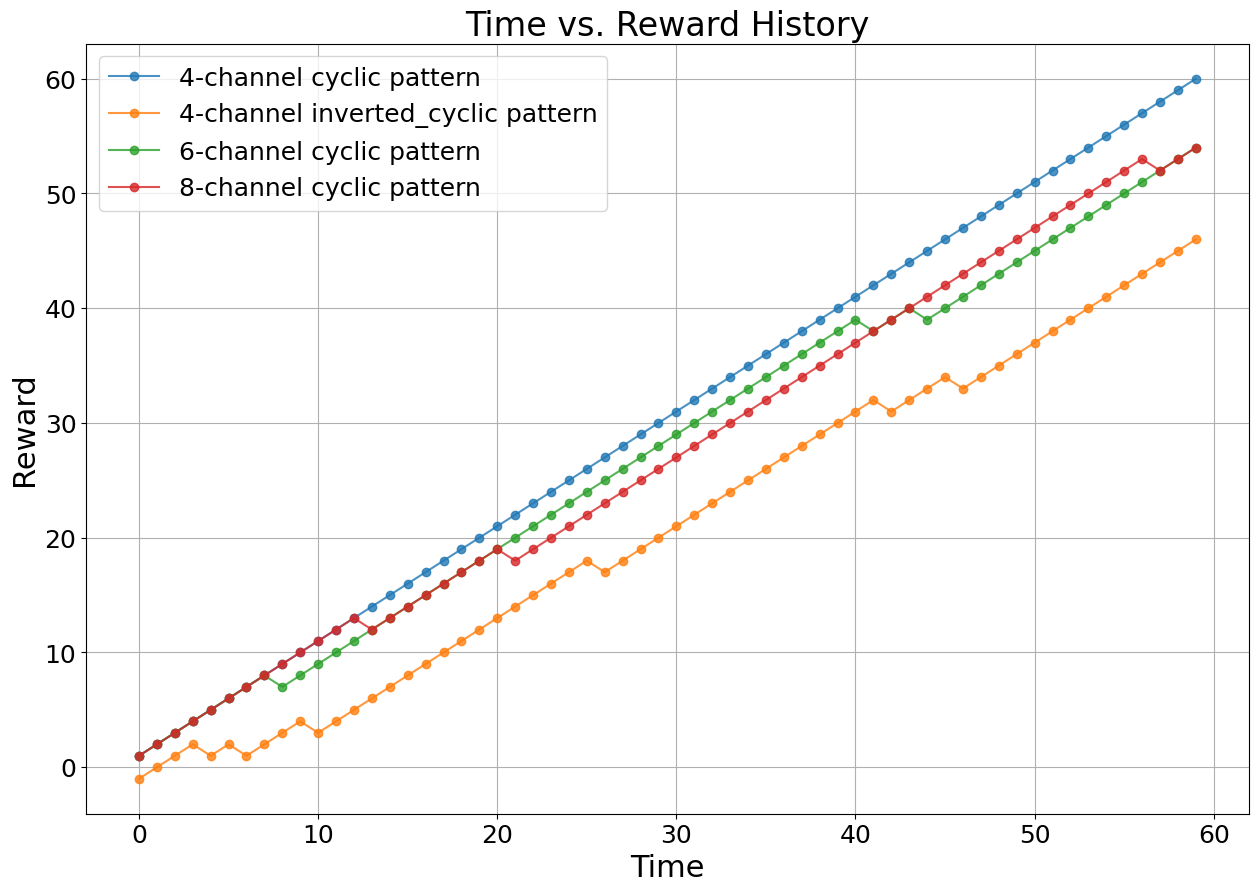

In [25]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(15, 10))

for index, row in results.iterrows():
    reward_history = row['reward_history']
    time_history = row['time_history']
    label = row['label']
    plt.plot(time_history, reward_history, marker='o', linestyle='-', label=label, alpha=0.8)

plt.title('Time vs. Reward History', fontsize=24)  # Increase title font size
plt.xlabel('Time', fontsize=22)  # Increase x-axis label font size
plt.ylabel('Reward', fontsize=22)  # Increase y-axis label font size
plt.grid(True)

# Increase font size of axis ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=18)  # Increase the legend font size
plt.savefig('./figures/01_time_vs_reward_history.png')
plt.show()


### Signal plots

In [2]:
labels = results.label.unique()
labels

array(['4-channel cyclic pattern ', '4-channel inverted_cyclic pattern',
       '6-channel cyclic pattern', '8-channel cyclic pattern'],
      dtype=object)

In [ ]:
results_all

Actions that were undefined:  0


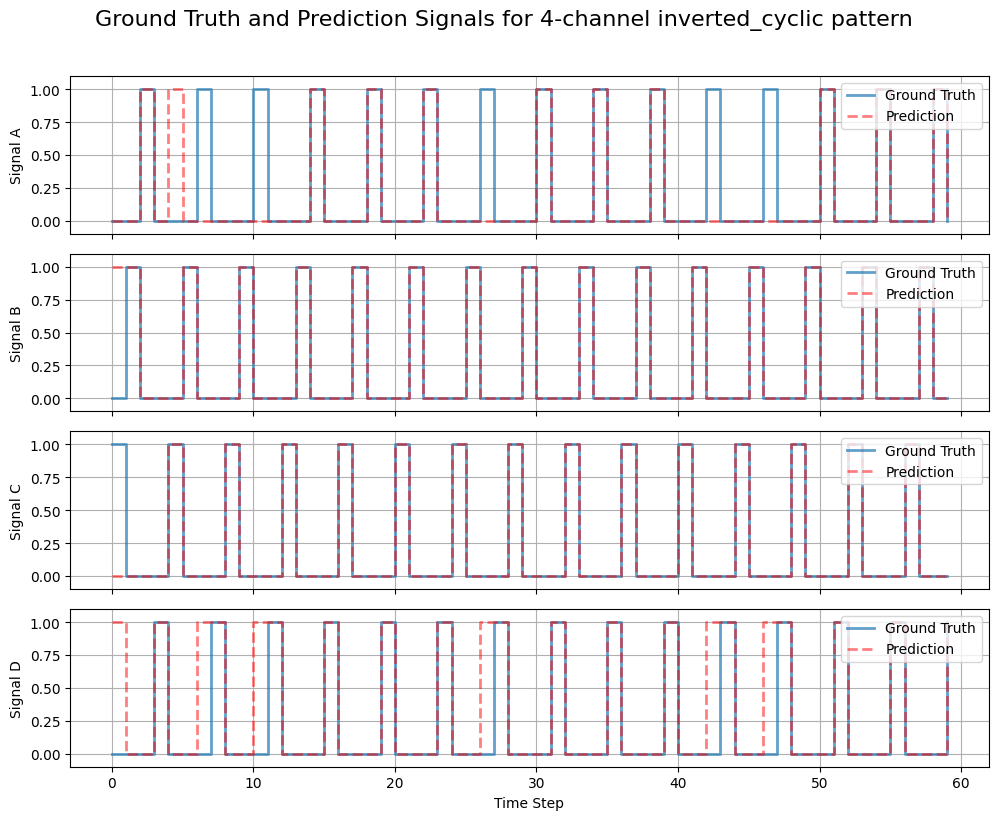

In [19]:
'microsoft/phi-2', 'microsoft/Phi-3-mini-4k-instruct',
'meta-llama/Llama-2-7b-chat-hf',
'meta-llama/Meta-Llama-3-8B-Instruct'
import matplotlib.pyplot as plt
model ='meta-llama/Meta-Llama-3-8B-Instruct'#"meta-llama/Llama-2-7b-chat-hf" #'meta-llama/Meta-Llama-3-8B-Instruct'# "microsoft/phi-2"#"openchat/openchat-3.5-0106"
#max_length = 5
label = "4-channel inverted_cyclic pattern"
sample = results_all[(results_all['model']==model) & (results_all['label']==label)]#.states_history.values[0]
data_gt = sample.states_history.values[0][1:]
data_pr = sample.action_history.values[0]


counter_undefined = 0
for action in data_pr: 
    if action == -100:
        counter_undefined += 1
print("Actions that were undefined: ", counter_undefined)

data_pr = [[0,0,0,0] if action == -100 else action for action in data_pr]

# Transpose the data to get columns as separate lists
# This makes it easy to iterate over each signal
transposed_data_gt = list(zip(*data_gt))


transposed_data_pr = list(zip(*data_pr))

# Number of subplots
num_signals = len(transposed_data_gt)

# Create a figure and an array of subplots with 1 column and `num_signals` rows
fig, axes = plt.subplots(nrows=num_signals, ncols=1, figsize=(10, 2 * num_signals), sharex=True)

# Add an overall title to the figure
#fig.suptitle(f'Ground Truth and Prediction Signals for {model} and max length: {max_length}', fontsize=16, y=1.02)
fig.suptitle(f'Ground Truth and Prediction Signals for {label}', fontsize=16, y=1.02)

channels = ['A', 'B', 'C', 'D']

# Iterate over each signal and plot it in a separate subplot
for i, (ax, signal_gt, signal_pr) in enumerate(zip(axes, transposed_data_gt, transposed_data_pr)):
    # Step plot for each binary signal

    ax.step(range(len(signal_gt)), signal_gt, where='post', label='Ground Truth', linewidth=2, alpha=0.7)
    # Prediction with dashed line and lower opacity
    ax.step(range(len(signal_pr)), signal_pr, where='post', linestyle='--', color='red', label='Prediction', linewidth=2, alpha=0.5)

    ax.set_ylim(-0.1, 1.1)  # Keep the y-axis limited to show binary signals clearly
    ax.set_ylabel(f'Signal {channels[i]}')
    ax.grid(True)
    # Add legend to each subplot
    ax.legend(loc='upper right')

# General settings
plt.xlabel('Time Step')
fig.tight_layout()
plt.savefig('./figures/02_signal_plots.png')
plt.show()

In [26]:
df1 = pd.read_json("./results/paper/greedy_sampler_agent_noise_pattern_full.json")
df1['label'] = '4-channel cyclic pattern with noise'

results_all = df1 

In [28]:
results_all.action_history.values[0]

[[55, 12, 23, 3],
 [22, 43, 24, 2],
 [21, 23, 21, 2],
 [21, 42, 23, 2],
 [21, 22, 43, 2],
 [23, 44, 22, 2],
 [21, 25, 43, 2],
 [41, 22, 23, 2],
 [24, 42, 21, 2],
 [22, 24, 41, 2],
 [44, 22, 23, 4],
 [22, 41, 21, 4],
 [24, 42, 21, 4],
 [45, 25, 42, 2],
 [45, 24, 23, 2],
 [44, 21, 25, 2],
 [21, 45, 25, 2],
 [25, 21, 42, 2],
 [21, 41, 24, 2],
 [43, 25, 25, 2],
 [24, 42, 22, 2],
 [23, 22, 41, 2],
 [43, 22, 25, 4],
 [43, 24, 22, 2],
 [21, 45, 23, 2],
 [45, 24, 24, 4],
 [44, 25, 22, 2],
 [42, 21, 24, 2],
 [21, 41, 23, 2],
 [21, 24, 42, 2],
 [25, 24, 25, 4],
 [25, 25, 21, 4],
 [25, 42, 22, 2],
 [21, 25, 43, 2],
 [45, 21, 24, 2],
 [25, 42, 21, 2],
 [21, 44, 24, 2],
 [21, 25, 23, 4],
 [22, 22, 24, 4],
 [45, 23, 22, 2],
 [23, 23, 44, 2],
 [21, 21, 24, 4],
 [21, 21, 22, 4],
 [45, 21, 21, 2],
 [21, 22, 44, 2],
 [22, 24, 43, 2],
 [23, 25, 45, 2],
 [44, 22, 22, 2],
 [23, 25, 42, 2],
 [22, 23, 42, 2],
 [22, 43, 23, 2],
 [43, 22, 23, 2],
 [23, 43, 21, 2],
 [22, 23, 41, 2],
 [42, 22, 21, 4],
 [23, 22, 

Actions that were undefined:  0


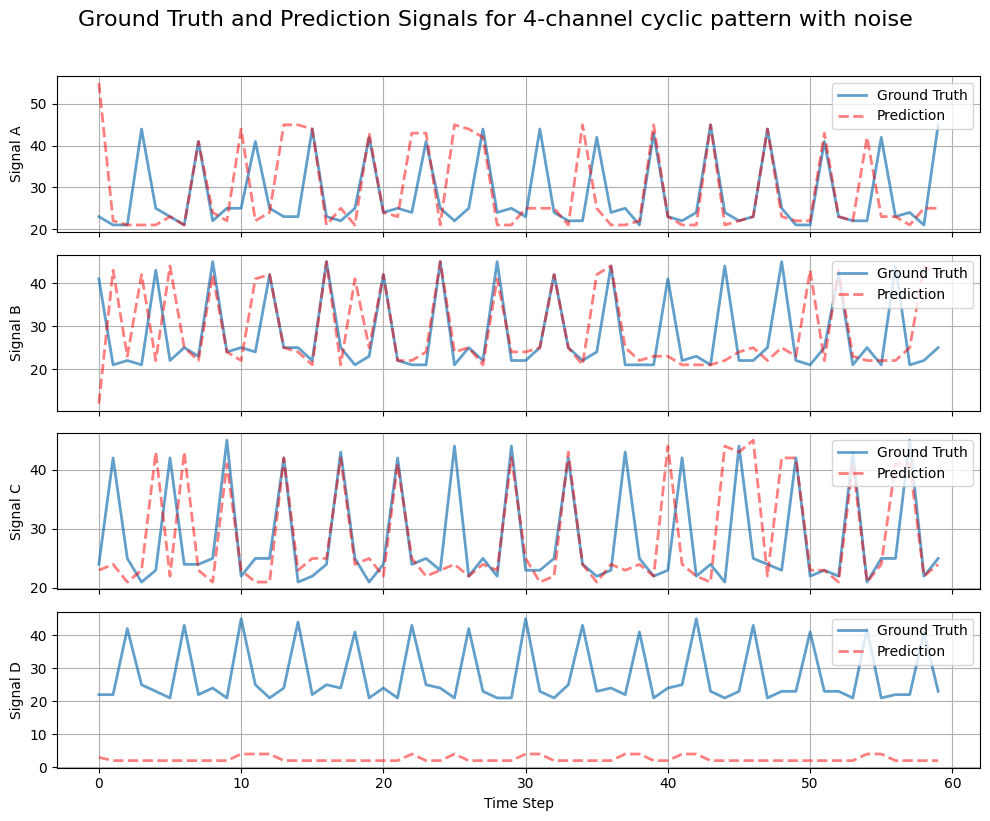

In [23]:
import matplotlib.pyplot as plt
model ='meta-llama/Meta-Llama-3-8B-Instruct'# "microsoft/phi-2"#"openchat/openchat-3.5-0106"
#max_length = 5
label = '4-channel cyclic pattern with noise'
sample = results_all[(results_all['model']==model) & (results_all['label']==label)]#.states_history.values[0]
data_gt = sample.states_history.values[0][1:]
data_pr = sample.action_history.values[0]

counter_undefined = 0
for action in data_pr: 
    if action == -100 or action==None:
        counter_undefined += 1
print("Actions that were undefined: ", counter_undefined)

data_pr = [[0,0,0,0] if action == -100 or action==None else action for action in data_pr]

# Transpose the data to get columns as separate lists
# This makes it easy to iterate over each signal
transposed_data_gt = list(zip(*data_gt))


transposed_data_pr = list(zip(*data_pr))

# Number of subplots
num_signals = len(transposed_data_gt)

# Create a figure and an array of subplots with 1 column and `num_signals` rows
fig, axes = plt.subplots(nrows=num_signals, ncols=1, figsize=(10, 2 * num_signals), sharex=True)

# Add an overall title to the figure
#fig.suptitle(f'Ground Truth and Prediction Signals for {model} and max length: {max_length}', fontsize=16, y=1.02)
fig.suptitle(f'Ground Truth and Prediction Signals for {label}', fontsize=16, y=1.02)

channels = ['A', 'B', 'C', 'D']

# Iterate over each signal and plot it in a separate subplot
for i, (ax, signal_gt, signal_pr) in enumerate(zip(axes, transposed_data_gt, transposed_data_pr)):
    # Step plot for each binary signal

    ax.plot(range(len(signal_gt)), signal_gt, label='Ground Truth', linewidth=2, alpha=0.7)
    # Prediction with dashed line and lower opacity
    ax.plot(range(len(signal_pr)), signal_pr, linestyle='--', color='red', label='Prediction', linewidth=2, alpha=0.5)

    #ax.set_ylim(-0.1, 1.1)  # Keep the y-axis limited to show binary signals clearly
    ax.set_ylabel(f'Signal {channels[i]}')
    ax.grid(True)
    # Add legend to each subplot
    ax.legend(loc='upper right')

# General settings
plt.xlabel('Time Step')
fig.tight_layout()
plt.savefig('./figures/03_signal_plot_noise.png')
plt.show()